**Implementing pre-trained models**

In [2]:
# Importing necessary libraries and rename them with specific aliases for easier identification in the context of brain tumor classification
from tensorflow.keras.applications import ResNet50 as Brain_tumorRNet
from tensorflow.keras.models import Model as Brain_tumorM

In [3]:
# Importing additional libraries for image processing, plotting, numerical operations, and warnings management
import imageio as Brain_tumorIGo
from matplotlib import pyplot as Brain_tumorOTp
import numpy as Brain_tumorPyn
import warnings as Brain_tumorWrn

# Suppressing warnings to keep the output clean
Brain_tumorWrn.filterwarnings("ignore")

In [4]:
# Defining the root directory where the MRI data is stored
Route_of_Image='/MRI DATA/'

In [5]:
# Defining parameters for dataset preparation
Brain_Tumor_Fi_1='training'
Brain_Tumor_Fi_2='validation'
Brain_Tumor_Fi_se=2
Brain_Tumor_Fi_size=(244,244)
Brain_Tumor_Fi_div=0.2

# Importing the function to load images from a directory and rename it with a specific alias
from tensorflow.keras.utils import image_dataset_from_directory as Brain_tumorASD

# Define the image size to match the model's input shape

# Set the image size to match the input size required by ResNet50
Brain_Tumor_Fi_size = (224, 224)

# Loading the training dataset from the specified directory with the given parameters
Brain_tumor_TT = Brain_tumorASD(
    Route_of_Image,
    validation_split=Brain_Tumor_Fi_div,
    subset=Brain_Tumor_Fi_1,
    seed=Brain_Tumor_Fi_se,
    image_size=Brain_Tumor_Fi_size,
    batch_size=100
)

# Loading the validation dataset similarly
Brain_tumor_VV = Brain_tumorASD(
    Route_of_Image,
    validation_split=Brain_Tumor_Fi_div,
    subset=Brain_Tumor_Fi_2,
    seed=Brain_Tumor_Fi_se,
    image_size=Brain_Tumor_Fi_size,
    batch_size=100
)

Found 1311 files belonging to 4 classes.
Using 1049 files for training.
Found 1311 files belonging to 4 classes.
Using 262 files for validation.


In [6]:
# Defining model parameters such as activation functions, input shape, and loss function
Brain_tumor_AA = 'tanh'
Brain_tumor_SS = (224, 224, 3)
Brain_tumor_S = 'softmax'
Brain_tumor_LL = 'SparseCategoricalCrossentropy'

# Importing the Adam optimizer from Keras and renaming it
from keras.optimizers import Adam as Brain_tumor_OO

# Importing layers for constructing the custom model
from tensorflow.keras.models import Sequential as Brain_tumorASD1
from tensorflow.keras.layers import Conv2D as Brain_tumorASD2
from tensorflow.keras.layers import MaxPooling2D as Brain_tumorASD3
from tensorflow.keras.layers import Dense as Brain_tumorASD4
from tensorflow.keras.layers import Flatten as Brain_tumorASD5
from tensorflow.keras.layers import BatchNormalization as Brain_tumorASD6

## **Pretrained Model 2 - ResNet 50**

In [7]:
# Loading the pre-trained ResNet50 model without the top layer, keeping the weights from ImageNet
Brain_tumor_pre_md = Brain_tumorRNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [8]:
# Displaying the structure of the training dataset (useful for debugging)
Brain_tumor_TT

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Epoch 1/5
11/11 [==============================] - 1133s 99s/step - loss: 0.7870 - accuracy: 0.7121 - val_loss: 0.9883 - val_accuracy: 0.6679
Epoch 2/5
11/11 [==============================] - 1076s 98s/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.6011 - val_accuracy: 0.8053
Epoch 3/5
11/11 [==============================] - 1050s 95s/step - loss: 0.0115 - accuracy: 0.9990 - val_loss: 0.7073 - val_accuracy: 0.8206
Epoch 4/5
11/11 [==============================] - 1066s 97s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.5148 - val_accuracy: 0.8740
Epoch 5/5
11/11 [==============================] - 1046s 95s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4797 - val_accuracy: 0.8779
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []       

<Figure size 640x480 with 0 Axes>

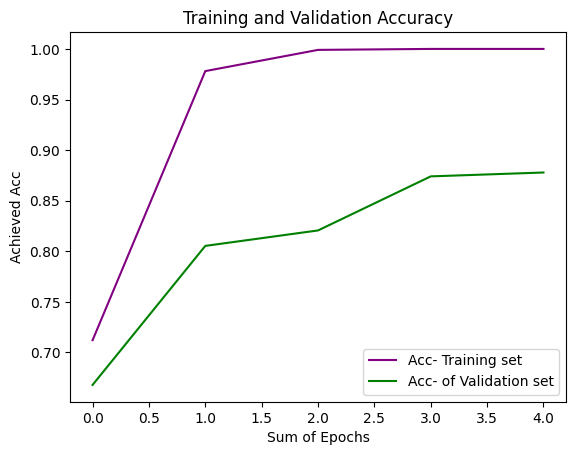

<Figure size 640x480 with 0 Axes>

In [9]:
# Adding custom layers on top of the pre-trained ResNet50 model to adapt it for the specific classification task
x_Brain_tumor = Brain_tumor_pre_md.output
x_Brain_tumor = Brain_tumorASD5()(x_Brain_tumor)
x_Brain_tumor = Brain_tumorASD4(32, activation='relu')(x_Brain_tumor)
pre_Brain_tumor = Brain_tumorASD4(4, activation='softmax')(x_Brain_tumor)
Brain_tumor_OOV = Brain_tumor_OO(learning_rate=0.0001)

# Initializing the Adam optimizer with a specified learning rate
melanoma_FPq = Brain_tumorM(inputs=Brain_tumor_pre_md.input, outputs=pre_Brain_tumor)

# Creating the final model by connecting the inputs of ResNet50 to the custom output layers
melanoma_FPq.compile(optimizer= Brain_tumor_OOV, loss= Brain_tumor_LL, metrics=['accuracy'])

# Training the model on the training dataset and validate it on the validation dataset for 5 epochs
Brain_tumor_Hs =melanoma_FPq.fit(Brain_tumor_TT, validation_data= Brain_tumor_VV, epochs=5, batch_size=5000)
# Printing the summary of the model architecture
print(melanoma_FPq.summary())

# Ploting training and validation accuracy over epochs for visualization
Brain_tumor_EE = range(len(Brain_tumor_Hs.history['accuracy']))
Brain_tumorOTp.plot(Brain_tumor_EE, Brain_tumor_Hs.history['accuracy'], 'purple', label='Acc- Training set')
Brain_tumorOTp.plot(Brain_tumor_EE, Brain_tumor_Hs.history['val_accuracy'], 'green', label='Acc- of Validation set')
Brain_tumorOTp.xlabel('Sum of Epochs')
Brain_tumorOTp.ylabel('Achieved Acc')
Brain_tumorOTp.title('Training and Validation Accuracy')
Brain_tumorOTp.legend(loc=0)
Brain_tumorOTp.figure()